In [1]:
from detectors import Morph, HED, ocr
import cv2
import os
from lib.utils import plt_imshow, find_contours, draw_contours

img = cv2.imread('image/navy_01.jpg', cv2.IMREAD_COLOR)

[RCF] loading...
[RCF] finished loading (0.0595 sec)
시작시간 : 2022-09-18 08:12:36.603626
종료시간 : 2022-09-18 08:12:36.940652
수행시간 : 0 초



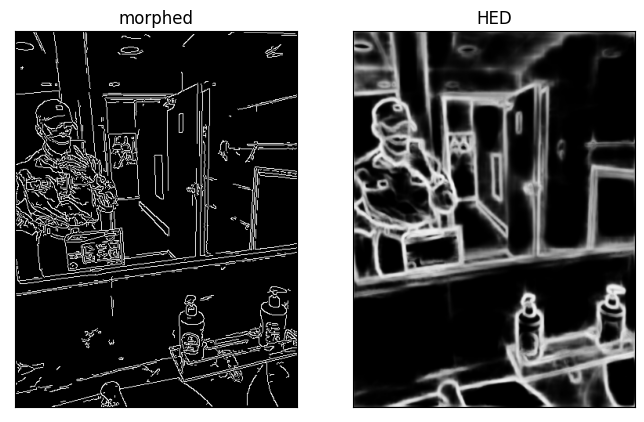

In [2]:
# load Engine
morph_engine, HED_engine = Morph(), HED()

# get edge image
morphed_edge, _ = morph_engine.detect_edge(img)
hed_edge = HED_engine.detect_edge(img, 500, 500)
# _, mixed = morph_engine.detect_edge(hed_edge, isEdge=True)

# show
plt_imshow(["morphed", "HED"], [morphed_edge, hed_edge])
# plt_imshow(["morphed", "HED", "mixed"], [morphed_edge, hed_edge, mixed])


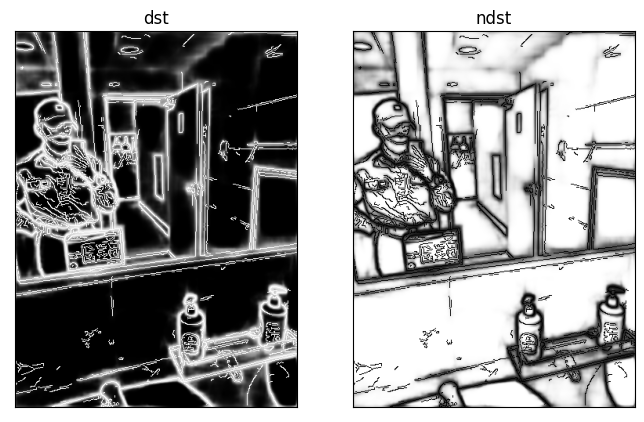

In [3]:
dst = cv2.bitwise_or(morphed_edge, hed_edge)
ndst = cv2.bitwise_not(dst)
plt_imshow(['dst', 'ndst'], [dst, ndst])

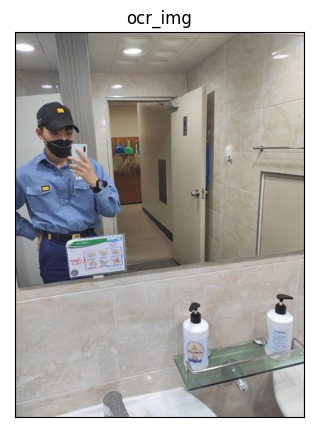

In [4]:
obj = ocr.ocr(img)

print(obj['str'])
plt_imshow(['ocr_img'], [obj['img']])

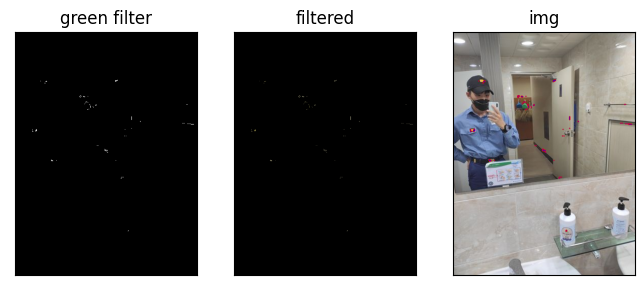

In [5]:
import numpy as np

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

sensitivity = 50
# mask_green = cv2.inRange(hsv, (0,0,255-sensitivity), (285,sensitivity,255))
mask_green = cv2.inRange(hsv, (25,50,50), (32,255,255))

imask_green = mask_green > 0
green = np.zeros_like(img, np.uint8)
green[imask_green] = img[imask_green]

contours, hierarchy = cv2.findContours(mask_green, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for contour in contours:
    area = cv2.contourArea(contour)
    cv2.drawContours(img, [contour], 0, (0, 0, 255), 2)
    cv2.drawContours(img, [contour], 0, (255, 0, 0), -1)

plt_imshow(['green filter', 'filtered', 'img'], [mask_green, green, img])

In [6]:
hed_edge.shape

(480, 360)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

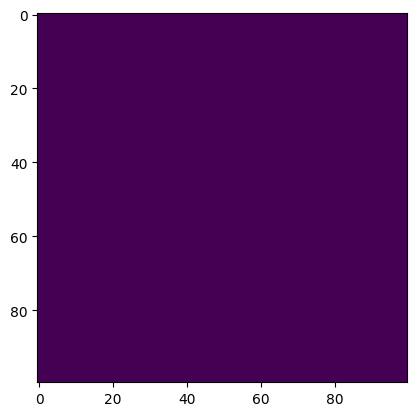

In [7]:
import numpy as np
import matplotlib.pyplot as plt

nz = np.zeros([100, 100])
plt.imshow(nz)
nz

In [9]:
mask_green.shape

(480, 360)